# Automatic Earthquake Detection

In [3]:
import glob,os
from obspy import read, Stream
import matplotlib.pyplot as plt
from obspy.signal.trigger import plot_trigger, recursive_sta_lta, trigger_onset, classic_sta_lta
%matplotlib inline

## Get list of the folders

In [4]:
cwd = os.getcwd()

dirs = [ name for name in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), name)) ]

## Remove unnecessary folder

In [5]:
dirs.remove('.ipynb_checkpoints')

## Get the list of the files inside in a folder

In [6]:
sacs = glob.glob(dirs[0] + '/*')

In [7]:
st = Stream()

### Read sac files one by one

In [8]:
for sac in sacs:
    st += read(sac,format='SAC')

### Read Traces one by one and Run several Early warning Methods

# Classic STA/LTA

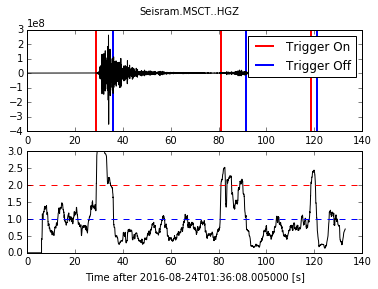

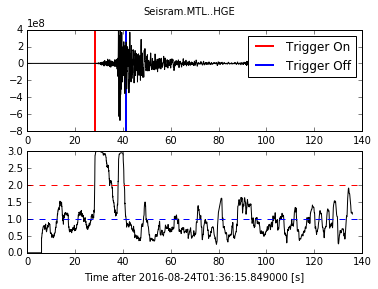

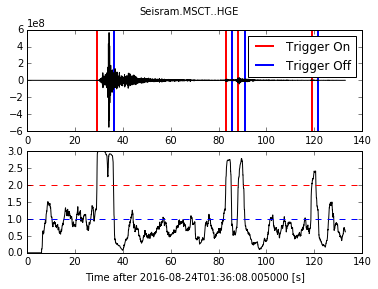

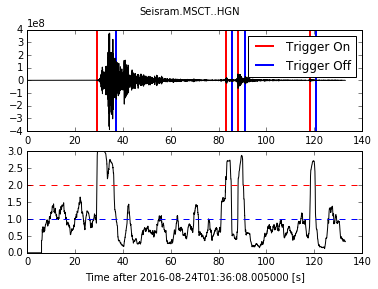

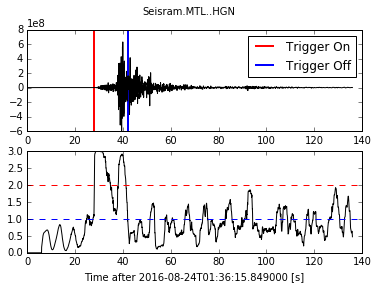

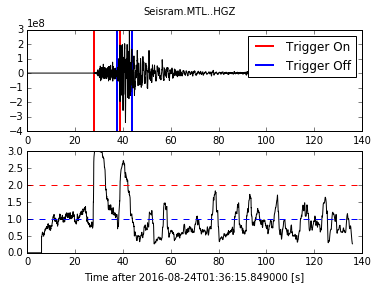

In [11]:
for tr in st:
    df = tr.stats.sampling_rate
    dt = tr.stats.delta
    # Classic STA/LTA
    cft = classic_sta_lta(tr.data, nsta = int(2 * df), nlta = int(6 * df))
    # nsta - Length of short time average window in samples
    # nlta - Length of long time average window in samples
    plot_trigger(tr, cft, thr_on = 2.0, thr_off = 1.0,show=True)
    # thr_on - threshold for switching trigger on
    # thr_off - threshold for switching trigger off

# Recursive STA/LTA

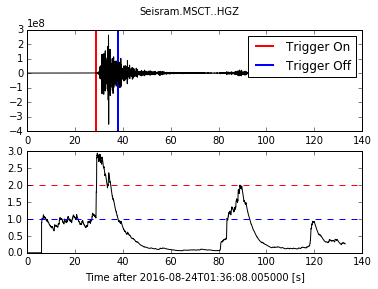

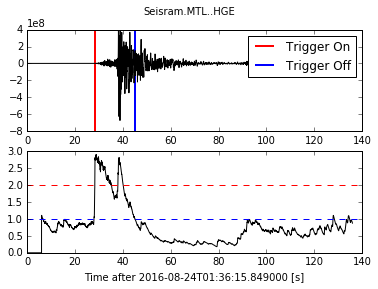

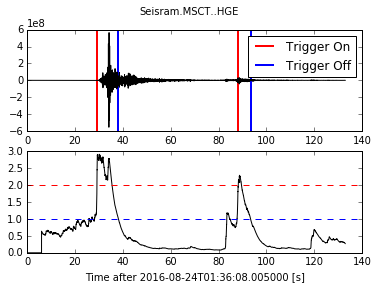

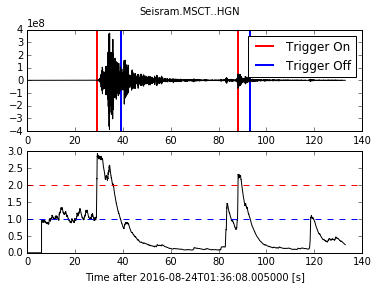

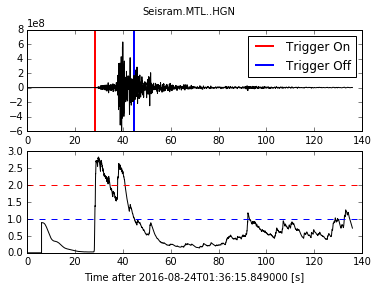

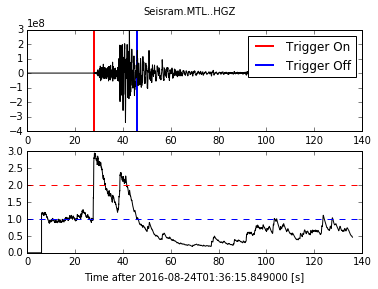

In [12]:
for tr in st:
    df = tr.stats.sampling_rate
    dt = tr.stats.delta
    # Classic STA/LTA
    cft = recursive_sta_lta(tr.data, nsta = int(2 * df), nlta = int(6 * df))
    # nsta - Length of short time average window in samples
    # nlta - Length of long time average window in samples
    plot_trigger(tr, cft, thr_on = 2.0, thr_off = 1.0,show=True)
    # thr_on - threshold for switching trigger on
    # thr_off - threshold for switching trigger off